In [30]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pytorch_lightning as pl

import sys
sys.path.insert(0, '../')

from src.lit_models import DCGAN

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
CHECKPOINT = '../outputs/2022-06-03/22-17-23/lightning_logs/version_0/checkpoints/epoch=99-step=37599.ckpt'

In [5]:
model = DCGAN.load_from_checkpoint(CHECKPOINT)

In [25]:
@torch.no_grad()
def plot_gen(model, n_samples=5, z_dim=100):
    
    model.eval()
    
    samples = torch.randn(n_samples, z_dim, 1, 1)
    fake = model(samples).squeeze(1).detach().numpy() * 100
   
    fig, ax = plt.subplots(1, n_samples, figsize=(10, 4))
    
    for i in range(n_samples):
        ax[i].imshow(fake[i])
        ax[i].axis('off')

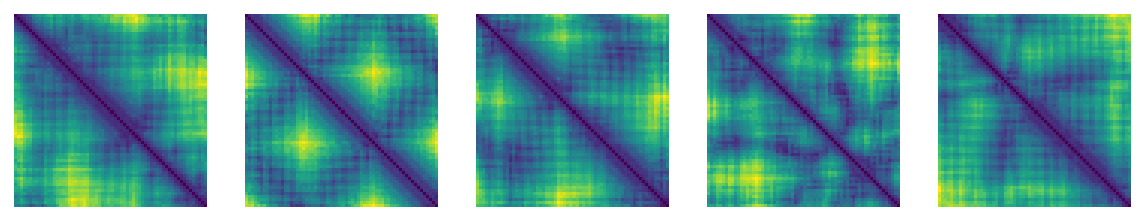

In [29]:
plot_gen(model)

In [31]:
@torch.no_grad()
def interpolate(model, steps=8, z_dim=100):
    
    model.eval()
    
    start = torch.randn(1, z_dim, 1, 1)
    end = torch.randn(1, z_dim, 1, 1)
    
    imgs = []
    for i in range(0, steps):
        interp = start*(steps-i)/steps + end*(i/steps)
        fake = model(interp).squeeze(1).detach().numpy() * 100
        imgs.append(fake)
        
    return np.array(imgs)

In [54]:
def plot_interp(interp_arr):
    
    interp_arr = interp_arr.squeeze(1)
    steps = interp_arr.shape[0]
    
    fig, ax = plt.subplots(1, steps, figsize=(20, 5))
    for i in range(steps):
        ax[i].imshow(interp_arr[i])
        ax[i].axis('off')
        
    plt.subplots_adjust(wspace=0.02)

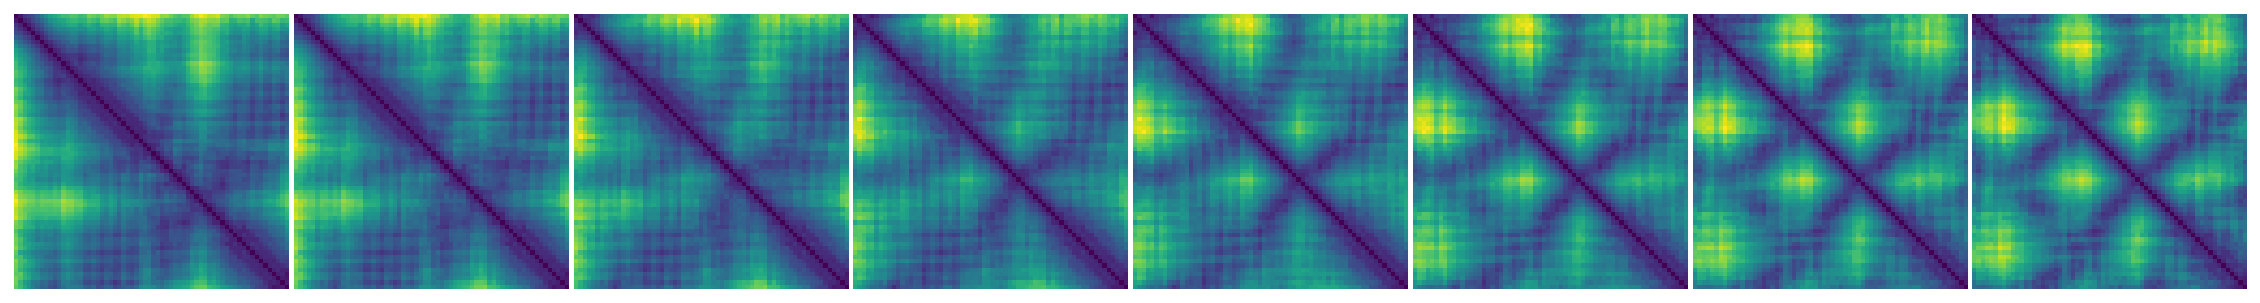

In [65]:
interp_arr = interpolate(model)
plot_interp(interp_arr)